# Correction Girds

In [1]:
# Hidden cell

%matplotlib inline

## Define Sampling Points 

The correction grid is generated along a set of half-light radii and Sersic indices. The generator loops through the Sersic indices for each half-light radius in the radius list. For this documentation we define a small set of values, with the Sersic indices of a Gaussian and de Vaucouleurs’ profile.


In [2]:
import numpy as np 

r_eff_list = np.array([50])
n_list = np.array([1, 2, 4])

## Correction Grid

We do a simple API call to generate the correction grid. We provide a PSF and oversampling rule as well. Oversampling becomes important for small half-light radii since the model needs to be sampled well in the center. 



### Load PSF 

We load an HST `F105W` PSF:

PSF Shape = (51, 51)


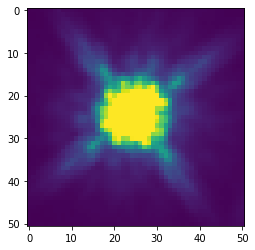

In [3]:
from astropy.io import fits

from matplotlib import pyplot as plt

# Load PSF image (2D array)
PSF = fits.getdata('data/f105w_psf.fits.gz')

# Normalize PSF 
PSF = PSF / PSF.sum()

# Note that the PSF shape is odd on all sides
print("PSF Shape = {}".format(PSF.shape))

# Plot PSF and use vmax and vmin to show difraction spikes
plt.imshow(PSF, vmin=0, vmax=5e-4)
plt.show()

### Generate Correction Grid

The `generate_petrosian_sersic_correction` grid follows the following steps to generate the correction grid:

- Computes the total flux (`total_flux`) of an ideal Sersic profile with the sampling points using the ` petrofit.models. sersic_enclosed` function and setting the radius to `np.inf`.
- Computes the radius equal to `total_flux * 0.99`.
- Makes a PSF convolved Sersic Model image and measures the photometry. 
- Measures the uncorrected Petrosian radius (). 
- Computes the correct `epsilon` value as ` corrected_epsilon = r_total_flux / r_petrosian`.
- It also saves other values, such as the uncorrected `C2080` which can be used to mapto the Sersic index.

In [ ]:
from petrofit.correction import generate_petrosian_sersic_correction

petrosian_grid = generate_petrosian_sersic_correction(
    output_yaml_name='example_correction_gid_no_psf_other.yaml',
    psf=PSF,
    r_eff_list=r_eff_list,
    #n_list=n_list,
    oversample=('x_0', 'y_0', 20, 100),
    plot=False,
)

In [ ]:
from petrofit.correction import generate_petrosian_sersic_correction

petrosian_grid = generate_petrosian_sersic_correction(
    output_yaml_name='example_correction_gid_no_psf_other.yaml',
    psf=None,
    r_eff_list=r_eff_list,
    #n_list=n_list,
    oversample=('x_0', 'y_0', 20, 100),
    plot=False,

)

In [7]:
from petrofit.correction import generate_petrosian_sersic_correction

petrosian_grid = generate_petrosian_sersic_correction(
    output_yaml_name='plot_correction_gid.yaml',
    psf=PSF,
    n_list=np.arange(0.5,5.5,0.5),
    r_eff_list=np.arange(10, 100, 5),
    oversample=('x_0', 'y_0', 5, 2000),
    plot=False,
)

FloatProgress(value=0.0)


plot_correction_gid.yaml


In [6]:
from petrofit.correction import generate_petrosian_sersic_correction

petrosian_grid = generate_petrosian_sersic_correction(
    output_yaml_name='plot_correction_gid_no_psf.yaml',
    psf=None,
    n_list=np.arange(0.5,5.5,0.5),
    r_eff_list=np.arange(10, 100, 5),
    oversample=('x_0', 'y_0', 5, 4000),
    plot=False,

)

FloatProgress(value=0.0)


plot_correction_gid_no_psf.yaml


## Test Grid

We test the correction gird by loading it into a ` PetrosianCorrection` and using it estimate values.


In [ ]:
from petrofit.petrosian import PetrosianCorrection

pc = PetrosianCorrection('temp/example_correction_gid.yaml')

In [ ]:
corrected_epsilon = pc.estimate_epsilon(
    r_hl_pet=15, 
    c2080pet=3,  
    verbose=True
)

print(corrected_epsilon)